In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits import mplot3d

In [4]:
# Reading in data

data = pd.read_csv('/Users/Chris/Documents/Data/train.csv/train.csv')

In [5]:
# Train-test split

data_train, data_test = train_test_split(data.copy(deep=True), test_size=0.1, random_state=314,
                                          stratify=data['Cover_Type'])

In [6]:
# Definining the continuous variables (soil types and wilderness areas are the categorical variables)

contvars = data.columns[1:11]

In [30]:
i=1
while i<= 4:
    wild = 'Wilderness_Area' + str(i)
    data_temp = data_train[data_train[wild]==1]
    i+=1

          Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
222      223       2952      51     10                               150   
12007  12008       2775      57     20                               277   
14413  14414       3328      59     14                                90   
11571  11572       2741      47     11                                30   
11407  11408       2614      71     14                               361   
...      ...        ...     ...    ...                               ...   
5862    5863       3039     321     29                               234   
1243    1244       2753      60     25                               242   
11821  11822       3050     330      8                               247   
145      146       2728     135      3                               242   
11488  11489       2893     121      6                               210   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
222          

Wilderness_Area1


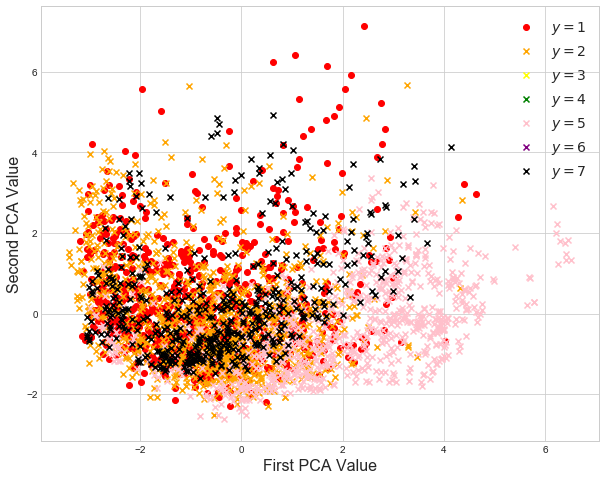

                                    component_1  component_2
Hillshade_3pm                         -0.501738     0.017221
Hillshade_Noon                        -0.434491    -0.136956
Horizontal_Distance_To_Roadways       -0.368366     0.126818
Aspect                                -0.315279     0.168365
Elevation                             -0.194560     0.295661
Horizontal_Distance_To_Fire_Points    -0.147367    -0.054363
Horizontal_Distance_To_Hydrology      -0.021163     0.588742
Vertical_Distance_To_Hydrology         0.127508     0.618729
Hillshade_9am                          0.327253    -0.210723
Slope                                  0.375514     0.268885


Wilderness_Area2


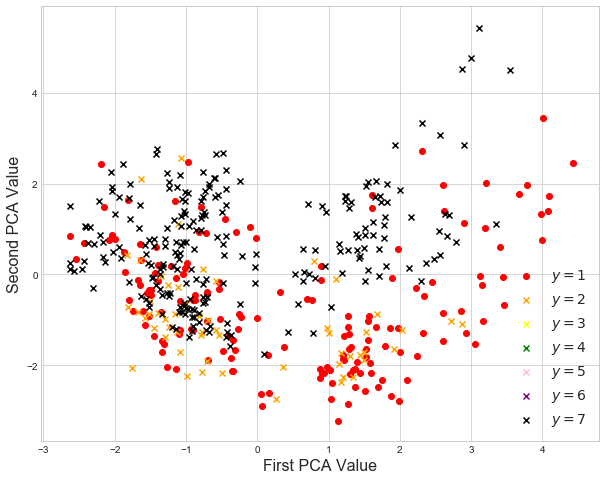

                                    component_1  component_2
Hillshade_9am                         -0.560541    -0.190364
Horizontal_Distance_To_Roadways       -0.165291     0.244397
Horizontal_Distance_To_Fire_Points    -0.118866    -0.096508
Elevation                             -0.094692     0.480092
Horizontal_Distance_To_Hydrology       0.018508     0.223637
Vertical_Distance_To_Hydrology         0.101725     0.449098
Hillshade_Noon                         0.109639    -0.479855
Slope                                  0.144027     0.411053
Aspect                                 0.515217    -0.077019
Hillshade_3pm                          0.571378    -0.085853


Wilderness_Area3


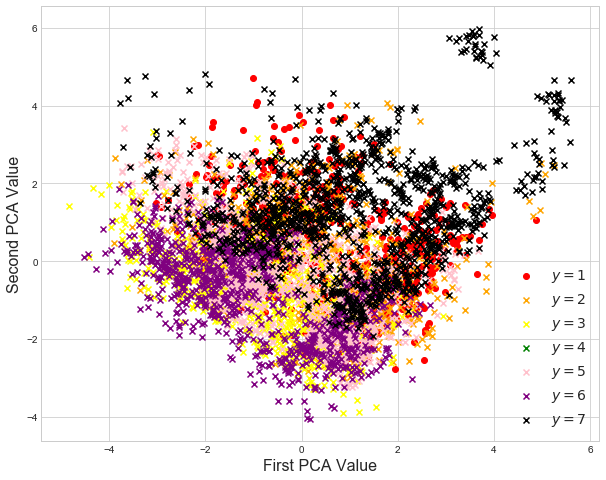

                                    component_1  component_2
Hillshade_9am                         -0.354863     0.292332
Slope                                 -0.118091     0.070881
Vertical_Distance_To_Hydrology         0.237402     0.367199
Horizontal_Distance_To_Fire_Points     0.247309     0.269560
Hillshade_Noon                         0.293535    -0.276180
Horizontal_Distance_To_Hydrology       0.303032     0.364899
Horizontal_Distance_To_Roadways        0.309197     0.327590
Elevation                              0.325253     0.379255
Aspect                                 0.389843    -0.301953
Hillshade_3pm                          0.459612    -0.387646


Wilderness_Area4


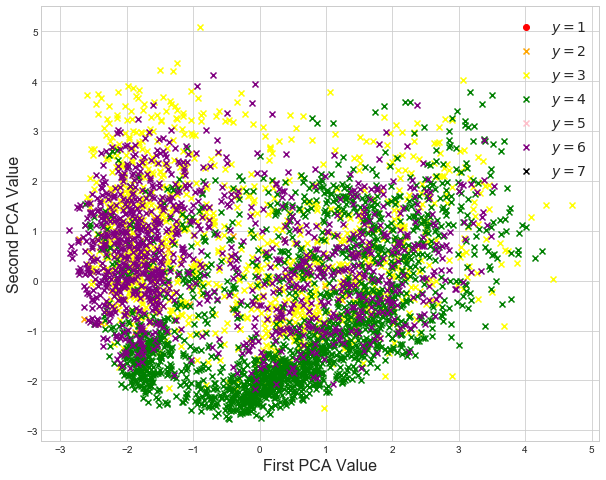

                                    component_1  component_2
Hillshade_3pm                         -0.583914     0.036321
Aspect                                -0.472267     0.153937
Hillshade_Noon                        -0.402704    -0.247478
Horizontal_Distance_To_Roadways       -0.140614    -0.071383
Elevation                             -0.137226     0.217303
Horizontal_Distance_To_Fire_Points    -0.019135     0.034950
Horizontal_Distance_To_Hydrology      -0.013348     0.554716
Vertical_Distance_To_Hydrology         0.058721     0.583414
Slope                                  0.238410     0.386839
Hillshade_9am                          0.417616    -0.249947




In [40]:
# Looping through Wilderness Areas 1-4
i=1
while i<= 4:
    wild = 'Wilderness_Area' + str(i)
    print(wild)
    data_temp = data_train[data_train[wild]==1]
    
    # Pipeline: scale -> pca(2)
    pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

    fit = pipe.fit_transform(data_temp[contvars])
    
    # Plotting graphs
    plt.figure(figsize=(10,8))

    plt.scatter(fit[data_temp.Cover_Type==1, 0], 
                fit[data_temp.Cover_Type==1, 1],
                color = 'red',
                label="$y=1$")

    plt.scatter(fit[data_temp.Cover_Type==2, 0], 
                fit[data_temp.Cover_Type==2, 1],
                color='orange',
                marker='x',
                label="$y=2$")

    plt.scatter(fit[data_temp.Cover_Type==3, 0], 
                fit[data_temp.Cover_Type==3, 1],
                color='yellow',
                marker='x',
                label="$y=3$")


    plt.scatter(fit[data_temp.Cover_Type==4, 0], 
                fit[data_temp.Cover_Type==4, 1],
                color='green',
                marker='x',
                label="$y=4$")

    plt.scatter(fit[data_temp.Cover_Type==5, 0], 
                fit[data_temp.Cover_Type==5, 1],
                color='pink',
                marker='x',
                label="$y=5$")

    plt.scatter(fit[data_temp.Cover_Type==6, 0], 
                fit[data_temp.Cover_Type==6, 1],
                color='purple',
                marker='x',
                label="$y=6$")

    plt.scatter(fit[data_temp.Cover_Type==7, 0], 
                fit[data_temp.Cover_Type==7, 1],
                color='black',
                marker='x',
                label="$y=7$")

    plt.legend(fontsize=14)

    plt.xlabel("First PCA Value", fontsize=16)
    plt.ylabel("Second PCA Value", fontsize=16)

    plt.show()
    
    # Shows what the component vectors are
    component_vectors = pd.DataFrame(pipe['pca'].components_.transpose(),
                                    columns = ['component_1', 'component_2'],
                                    index = contvars)

    print(component_vectors.sort_values('component_1'))
    print()
    print()
    
    
    i+=1

Soil_Type1


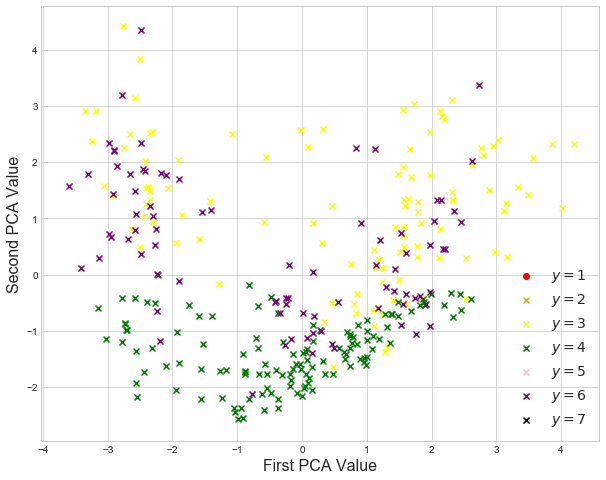

                                    component_1  component_2
Hillshade_3pm                         -0.517828     0.107872
Hillshade_Noon                        -0.481206    -0.110496
Aspect                                -0.451373     0.156871
Horizontal_Distance_To_Roadways       -0.283920    -0.313452
Horizontal_Distance_To_Fire_Points    -0.105904    -0.188396
Elevation                             -0.095684    -0.139082
Horizontal_Distance_To_Hydrology      -0.061197     0.536756
Vertical_Distance_To_Hydrology         0.070916     0.503174
Slope                                  0.190070     0.390148
Hillshade_9am                          0.388168    -0.323960


Soil_Type2


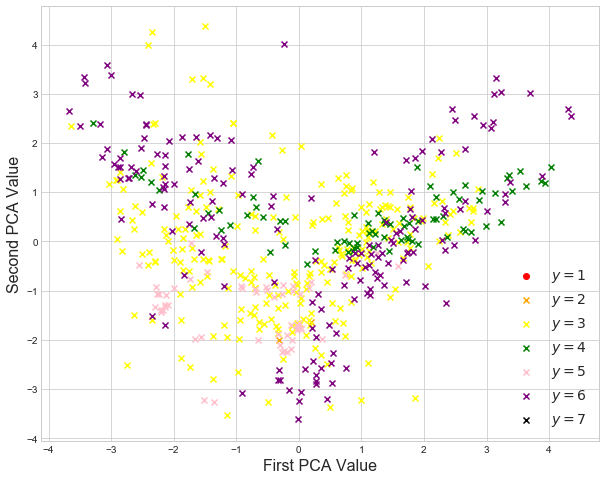

                                    component_1  component_2
Hillshade_3pm                         -0.556389     0.100734
Hillshade_Noon                        -0.467464    -0.082025
Aspect                                -0.444419     0.222604
Elevation                             -0.175463    -0.509516
Horizontal_Distance_To_Roadways       -0.123586    -0.341394
Horizontal_Distance_To_Fire_Points    -0.071661    -0.515380
Horizontal_Distance_To_Hydrology       0.015194     0.049192
Vertical_Distance_To_Hydrology         0.040798     0.252399
Slope                                  0.140008     0.395352
Hillshade_9am                          0.449118    -0.263383


Soil_Type3


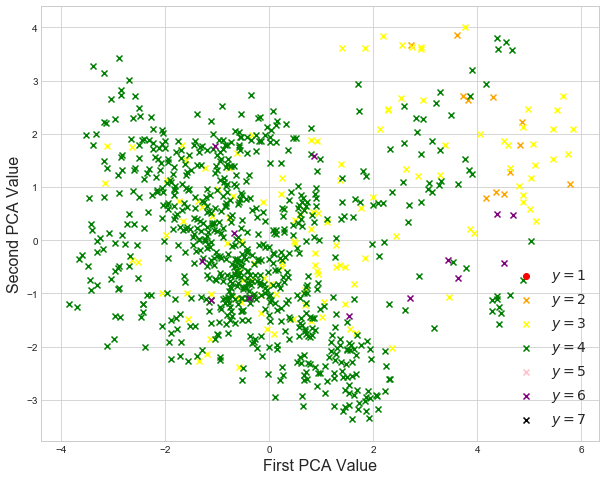

                                    component_1  component_2
Hillshade_9am                         -0.422513    -0.121904
Slope                                 -0.341405     0.269295
Vertical_Distance_To_Hydrology        -0.174587     0.540159
Horizontal_Distance_To_Hydrology      -0.081423     0.579816
Horizontal_Distance_To_Fire_Points     0.040291     0.129179
Elevation                              0.173521     0.444552
Horizontal_Distance_To_Roadways        0.190043    -0.061239
Aspect                                 0.333469     0.255134
Hillshade_Noon                         0.480444     0.033104
Hillshade_3pm                          0.507876     0.020199


Soil_Type4


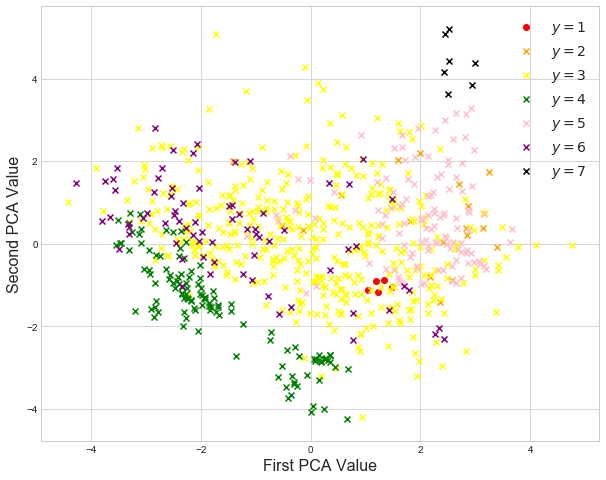

                                    component_1  component_2
Hillshade_9am                         -0.360800     0.345355
Slope                                  0.070159     0.170132
Horizontal_Distance_To_Fire_Points     0.220320     0.244682
Horizontal_Distance_To_Roadways        0.228358     0.123453
Horizontal_Distance_To_Hydrology       0.247504     0.463427
Vertical_Distance_To_Hydrology         0.258012     0.423137
Elevation                              0.360166     0.385849
Aspect                                 0.379491    -0.286305
Hillshade_Noon                         0.418424    -0.172557
Hillshade_3pm                          0.433097    -0.349629


Soil_Type5


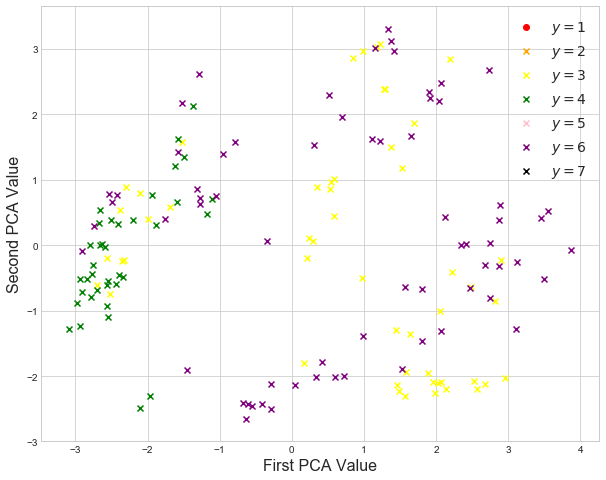

                                    component_1  component_2
Hillshade_9am                         -0.416063     0.223438
Elevation                             -0.393897    -0.155554
Horizontal_Distance_To_Fire_Points    -0.310430     0.032507
Horizontal_Distance_To_Roadways       -0.290937    -0.067286
Hillshade_Noon                        -0.147635    -0.564142
Hillshade_3pm                          0.235823    -0.548724
Aspect                                 0.258702    -0.425257
Vertical_Distance_To_Hydrology         0.335177     0.083293
Horizontal_Distance_To_Hydrology       0.341094     0.128160
Slope                                  0.343077     0.311020


Soil_Type6


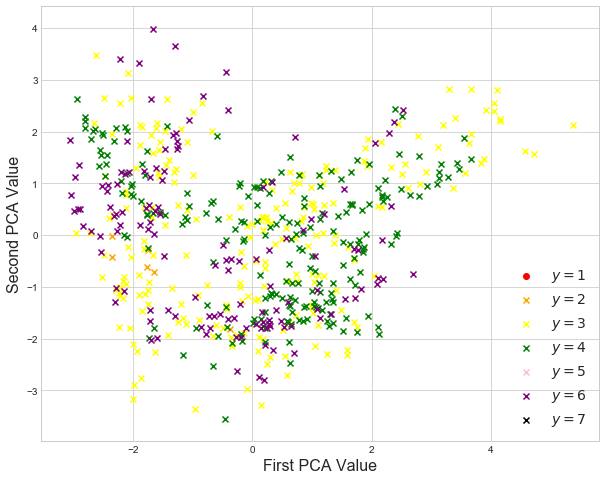

                                    component_1  component_2
Hillshade_3pm                         -0.553060     0.096025
Hillshade_Noon                        -0.418976    -0.142015
Aspect                                -0.412683     0.210829
Elevation                             -0.249345    -0.444215
Horizontal_Distance_To_Hydrology      -0.184523    -0.117773
Horizontal_Distance_To_Roadways       -0.106260     0.361595
Vertical_Distance_To_Hydrology        -0.069654    -0.079862
Horizontal_Distance_To_Fire_Points    -0.003100    -0.560017
Slope                                  0.250598     0.416743
Hillshade_9am                          0.416057    -0.300902


Soil_Type9


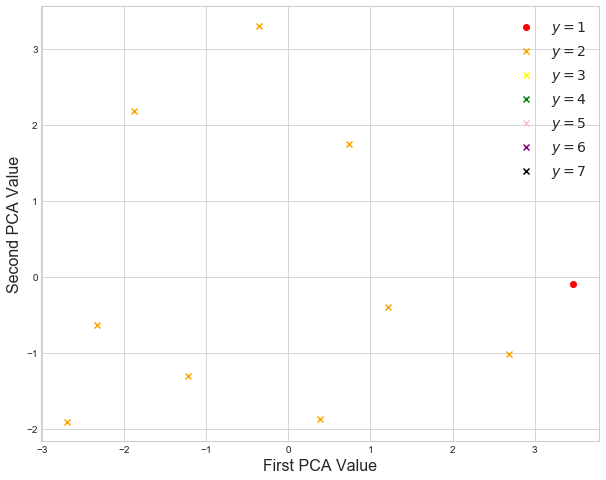

                                    component_1  component_2
Slope                                 -0.454828    -0.183107
Horizontal_Distance_To_Roadways       -0.307999     0.362064
Vertical_Distance_To_Hydrology        -0.274528    -0.408079
Elevation                             -0.252881     0.221106
Hillshade_9am                         -0.126030     0.380738
Horizontal_Distance_To_Fire_Points     0.085010    -0.538147
Horizontal_Distance_To_Hydrology       0.233354    -0.327454
Aspect                                 0.300190     0.124370
Hillshade_Noon                         0.437179     0.250215
Hillshade_3pm                          0.447380    -0.009973


Soil_Type10


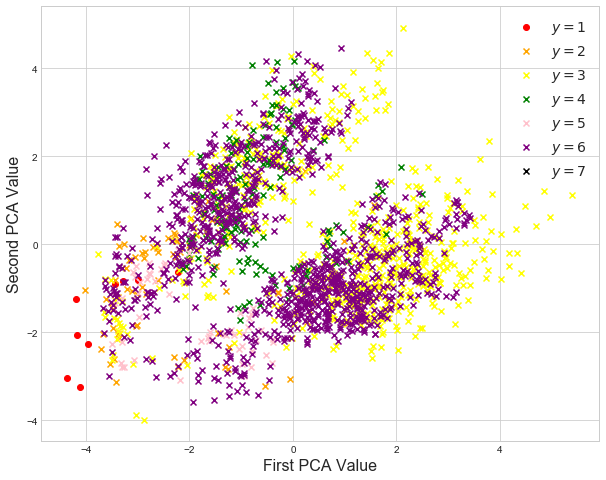

                                    component_1  component_2
Hillshade_9am                         -0.511356     0.142710
Elevation                             -0.378147    -0.315959
Horizontal_Distance_To_Roadways       -0.306482    -0.261113
Horizontal_Distance_To_Fire_Points    -0.270257    -0.252573
Hillshade_Noon                        -0.045150    -0.528425
Horizontal_Distance_To_Hydrology       0.016366    -0.167805
Vertical_Distance_To_Hydrology         0.191292    -0.083053
Slope                                  0.351274     0.294389
Aspect                                 0.358116    -0.384266
Hillshade_3pm                          0.371499    -0.446337


Soil_Type11


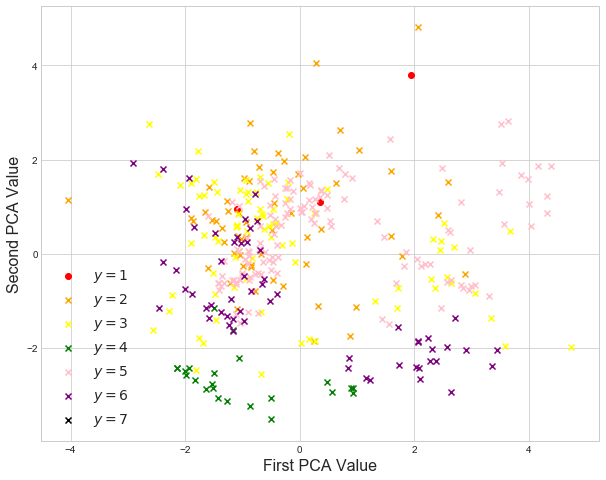

                                    component_1  component_2
Hillshade_9am                         -0.478705     0.197516
Slope                                  0.025701     0.108950
Horizontal_Distance_To_Fire_Points     0.025798     0.234325
Horizontal_Distance_To_Roadways        0.123134     0.299110
Elevation                              0.148501     0.556308
Hillshade_Noon                         0.166879    -0.216779
Horizontal_Distance_To_Hydrology       0.285896     0.450748
Vertical_Distance_To_Hydrology         0.380882     0.332210
Aspect                                 0.455297    -0.220302
Hillshade_3pm                          0.519952    -0.293599


Soil_Type12


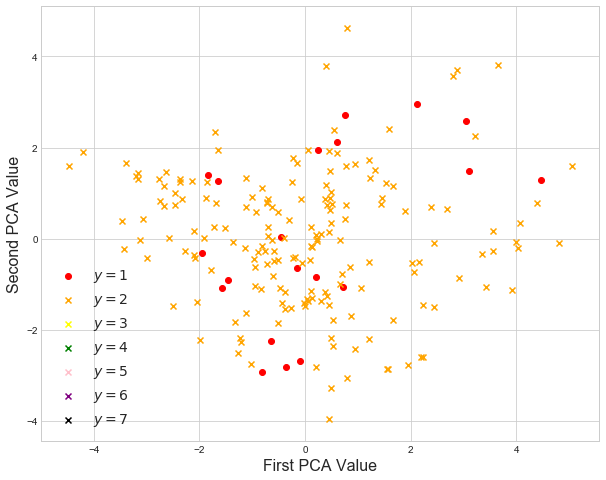

                                    component_1  component_2
Hillshade_9am                         -0.328111     0.197707
Slope                                 -0.310034     0.252356
Vertical_Distance_To_Hydrology         0.143639     0.408759
Horizontal_Distance_To_Hydrology       0.162975     0.378473
Horizontal_Distance_To_Fire_Points     0.272594     0.223400
Aspect                                 0.302376    -0.236999
Hillshade_Noon                         0.337371    -0.299168
Elevation                              0.351801     0.396395
Horizontal_Distance_To_Roadways        0.384815     0.360224
Hillshade_3pm                          0.444549    -0.323165


Soil_Type13


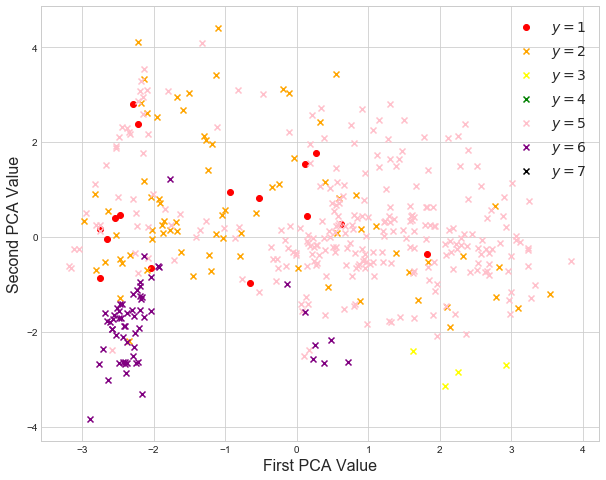

                                    component_1  component_2
Hillshade_3pm                         -0.518531     0.069643
Aspect                                -0.476327    -0.026518
Horizontal_Distance_To_Fire_Points    -0.372663    -0.053499
Hillshade_Noon                        -0.326031     0.313695
Horizontal_Distance_To_Roadways       -0.036897     0.280807
Horizontal_Distance_To_Hydrology      -0.030759     0.554759
Elevation                              0.077481     0.519515
Slope                                  0.117358    -0.206051
Vertical_Distance_To_Hydrology         0.168896     0.429742
Hillshade_9am                          0.456568     0.097664


Soil_Type14


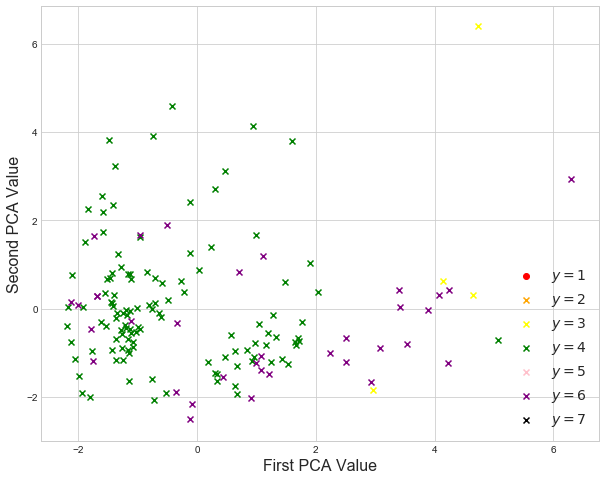

                                    component_1  component_2
Hillshade_9am                         -0.511775     0.083856
Horizontal_Distance_To_Fire_Points    -0.173029    -0.135347
Hillshade_Noon                        -0.126889    -0.595384
Elevation                             -0.101662    -0.149939
Horizontal_Distance_To_Roadways        0.140217    -0.093011
Slope                                  0.294368     0.498204
Vertical_Distance_To_Hydrology         0.363220     0.180936
Aspect                                 0.369608    -0.301461
Hillshade_3pm                          0.379316    -0.464182
Horizontal_Distance_To_Hydrology       0.403707     0.041779


Soil_Type16


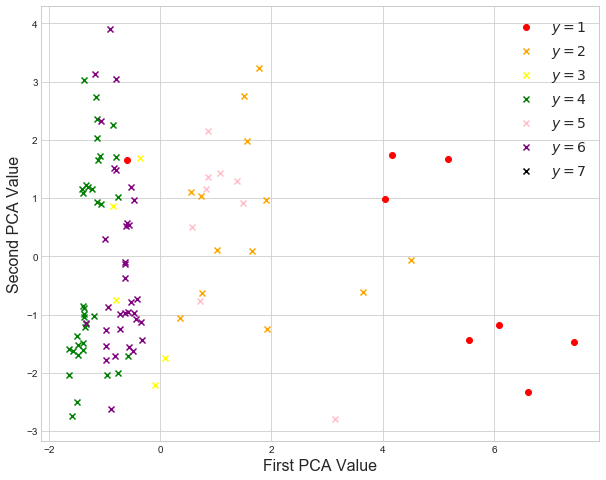

                                    component_1  component_2
Slope                                 -0.059259    -0.013845
Aspect                                -0.031592    -0.507873
Hillshade_3pm                         -0.015869    -0.598229
Hillshade_Noon                         0.030129    -0.238742
Hillshade_9am                          0.037243     0.556009
Vertical_Distance_To_Hydrology         0.401704    -0.066167
Horizontal_Distance_To_Fire_Points     0.413359    -0.024811
Horizontal_Distance_To_Hydrology       0.458876    -0.082699
Elevation                              0.471093     0.077502
Horizontal_Distance_To_Roadways        0.477719    -0.003349


Soil_Type17


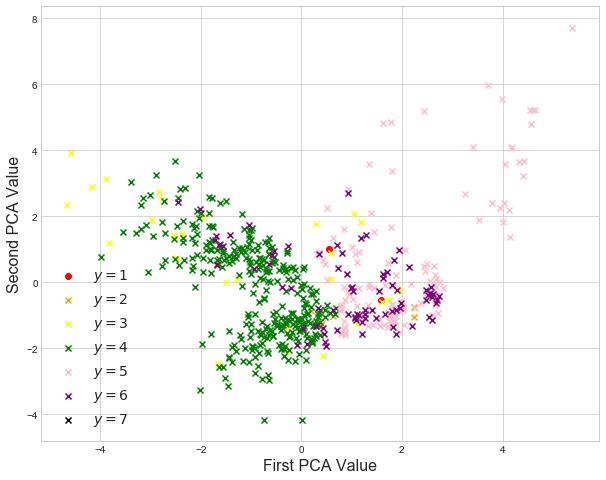

                                    component_1  component_2
Slope                                 -0.314777     0.108594
Aspect                                -0.231091     0.438412
Hillshade_3pm                         -0.148248     0.525594
Hillshade_Noon                         0.212886     0.240122
Vertical_Distance_To_Hydrology         0.221611     0.366884
Horizontal_Distance_To_Hydrology       0.311946     0.299642
Horizontal_Distance_To_Roadways        0.316093     0.167259
Hillshade_9am                          0.339129    -0.439303
Horizontal_Distance_To_Fire_Points     0.417799     0.088595
Elevation                              0.494281     0.094306


Soil_Type18


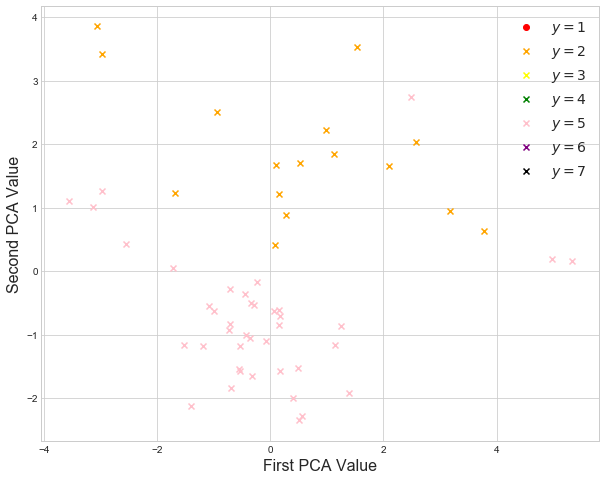

                                    component_1  component_2
Slope                                 -0.392055     0.256711
Hillshade_9am                         -0.329375    -0.103061
Horizontal_Distance_To_Hydrology       0.007309     0.537487
Horizontal_Distance_To_Fire_Points     0.048433    -0.501514
Horizontal_Distance_To_Roadways        0.073468     0.329255
Vertical_Distance_To_Hydrology         0.253825     0.369983
Aspect                                 0.293993     0.072440
Elevation                              0.297910     0.289768
Hillshade_Noon                         0.463451    -0.203543
Hillshade_3pm                          0.524987    -0.084440


Soil_Type19


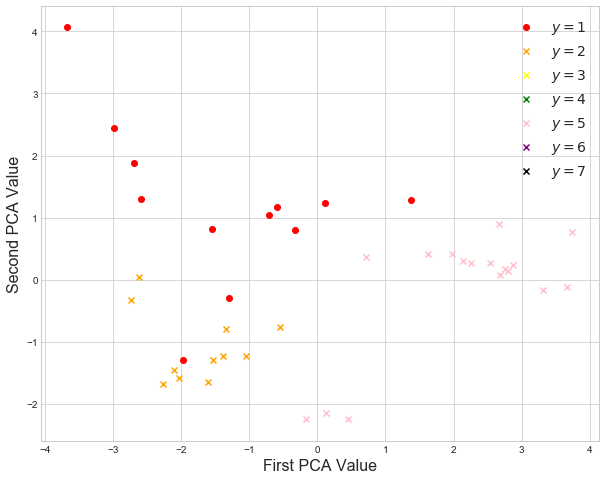

                                    component_1  component_2
Hillshade_9am                         -0.396224    -0.184360
Horizontal_Distance_To_Roadways       -0.329447     0.057152
Horizontal_Distance_To_Fire_Points    -0.308443    -0.092489
Horizontal_Distance_To_Hydrology      -0.281566     0.432362
Elevation                             -0.236136     0.529734
Vertical_Distance_To_Hydrology        -0.162044     0.467327
Hillshade_Noon                         0.273093     0.324048
Slope                                  0.296043    -0.177189
Aspect                                 0.390138     0.237991
Hillshade_3pm                          0.404484     0.274224


Soil_Type20


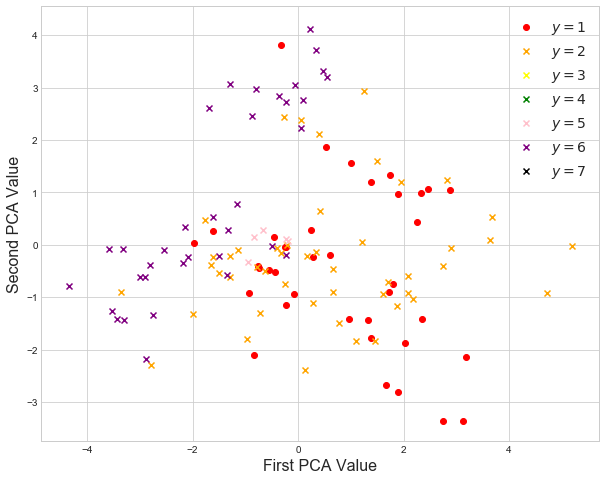

                                    component_1  component_2
Slope                                 -0.377649     0.006295
Hillshade_9am                         -0.028879    -0.508772
Vertical_Distance_To_Hydrology         0.206220    -0.209526
Aspect                                 0.208961     0.458745
Hillshade_3pm                          0.298076     0.516065
Horizontal_Distance_To_Fire_Points     0.323719    -0.160136
Horizontal_Distance_To_Hydrology       0.327574    -0.278319
Elevation                              0.388082    -0.234815
Horizontal_Distance_To_Roadways        0.397616    -0.156878
Hillshade_Noon                         0.400877     0.193874


Soil_Type21


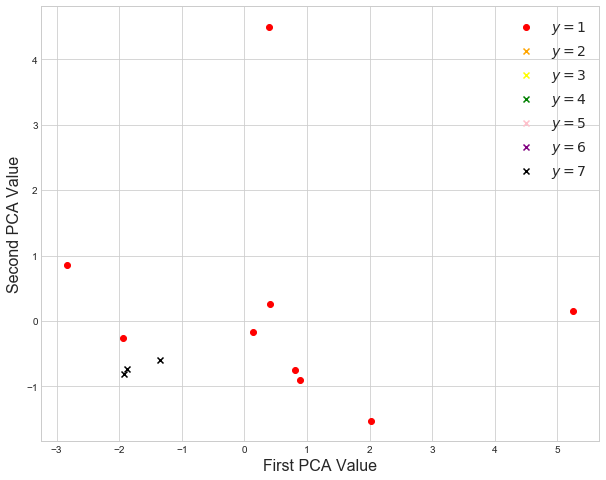

                                    component_1  component_2
Elevation                             -0.431870     0.096244
Hillshade_9am                         -0.431299    -0.014038
Horizontal_Distance_To_Hydrology      -0.346735    -0.074651
Hillshade_Noon                        -0.289140    -0.470151
Vertical_Distance_To_Hydrology        -0.216913     0.021034
Horizontal_Distance_To_Fire_Points    -0.202993    -0.382489
Aspect                                 0.165584    -0.530549
Hillshade_3pm                          0.239106    -0.508391
Slope                                  0.292043     0.236852
Horizontal_Distance_To_Roadways        0.406825    -0.145405


Soil_Type22


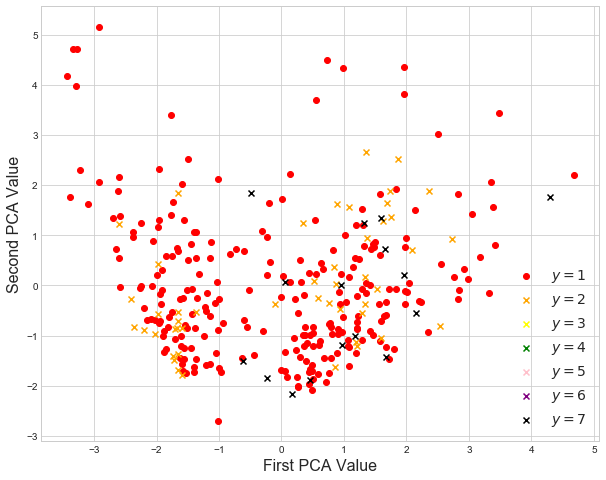

                                    component_1  component_2
Hillshade_3pm                         -0.585724    -0.046101
Aspect                                -0.487964     0.029153
Hillshade_Noon                        -0.341707    -0.321884
Horizontal_Distance_To_Hydrology      -0.121728     0.425964
Horizontal_Distance_To_Roadways       -0.081443    -0.329605
Vertical_Distance_To_Hydrology        -0.070169     0.511716
Elevation                             -0.037234     0.126388
Slope                                  0.092819     0.531739
Horizontal_Distance_To_Fire_Points     0.127978    -0.043573
Hillshade_9am                          0.499300    -0.202136


Soil_Type23


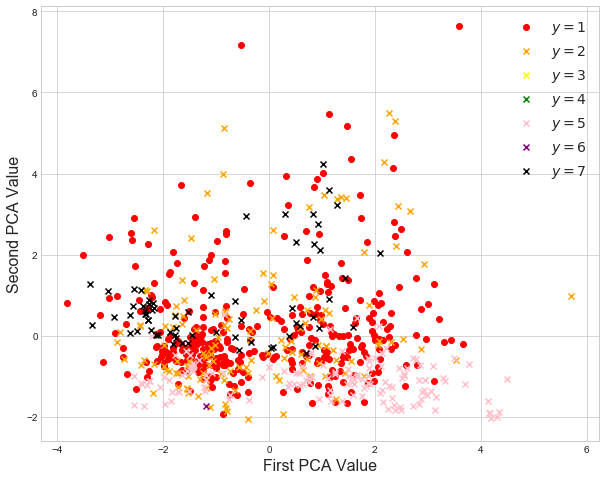

                                    component_1  component_2
Hillshade_9am                         -0.506354     0.036762
Horizontal_Distance_To_Fire_Points    -0.279017     0.187181
Elevation                             -0.124733     0.468445
Horizontal_Distance_To_Roadways       -0.116227     0.021251
Horizontal_Distance_To_Hydrology       0.051302     0.620646
Vertical_Distance_To_Hydrology         0.104030     0.588633
Slope                                  0.136797     0.048177
Hillshade_Noon                         0.311750     0.098438
Aspect                                 0.460341    -0.001599
Hillshade_3pm                          0.543524     0.003907


Soil_Type24


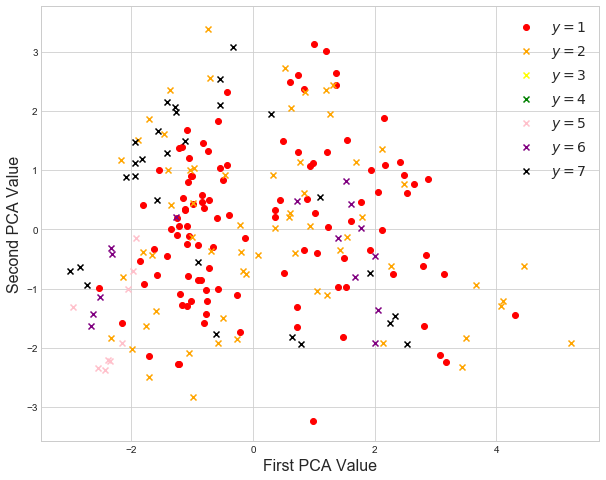

                                    component_1  component_2
Hillshade_9am                         -0.505905     0.229720
Horizontal_Distance_To_Hydrology      -0.095527    -0.342220
Elevation                             -0.042695     0.158877
Vertical_Distance_To_Hydrology        -0.028106    -0.429571
Slope                                  0.029188    -0.483318
Hillshade_Noon                         0.234681     0.536747
Horizontal_Distance_To_Fire_Points     0.244023    -0.249869
Horizontal_Distance_To_Roadways        0.325837    -0.155391
Aspect                                 0.452798     0.078885
Hillshade_3pm                          0.552858     0.076447


Soil_Type26


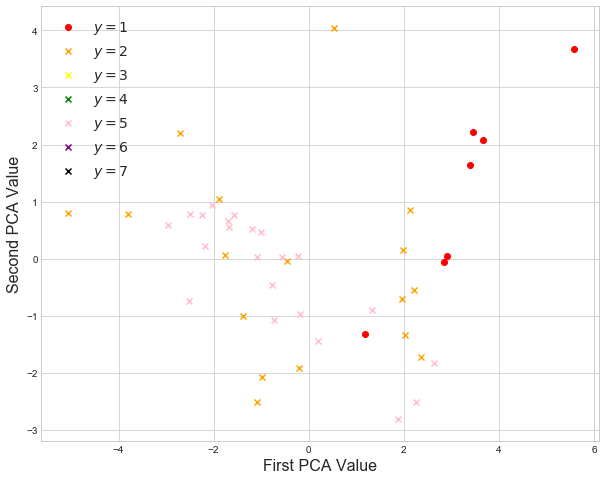

                                    component_1  component_2
Hillshade_Noon                        -0.399206    -0.201847
Aspect                                -0.391632     0.014847
Horizontal_Distance_To_Hydrology      -0.360653     0.324632
Horizontal_Distance_To_Roadways       -0.359441     0.286331
Hillshade_3pm                         -0.346516    -0.336485
Vertical_Distance_To_Hydrology        -0.342834     0.290275
Elevation                             -0.001332     0.583610
Slope                                  0.074274     0.368196
Hillshade_9am                          0.175399     0.283925
Horizontal_Distance_To_Fire_Points     0.392553     0.131913


Soil_Type27


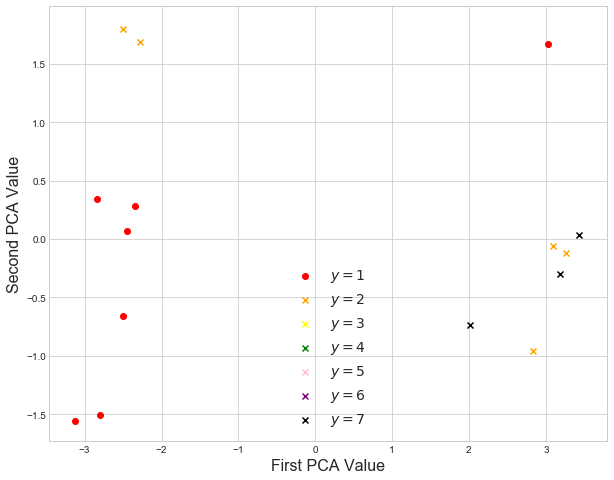

                                    component_1  component_2
Hillshade_9am                         -0.347067    -0.060069
Hillshade_Noon                        -0.259287    -0.163712
Slope                                  0.145155     0.863660
Horizontal_Distance_To_Roadways        0.315286    -0.362771
Elevation                              0.326599    -0.190300
Vertical_Distance_To_Hydrology         0.333103     0.106390
Horizontal_Distance_To_Hydrology       0.336362     0.110808
Hillshade_3pm                          0.341922    -0.077265
Horizontal_Distance_To_Fire_Points     0.346283    -0.162030
Aspect                                 0.352496    -0.006571


Soil_Type28


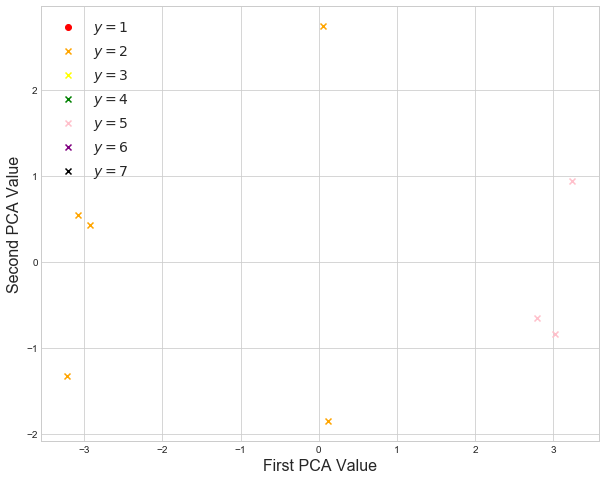

                                    component_1  component_2
Horizontal_Distance_To_Fire_Points    -0.355955    -0.228765
Horizontal_Distance_To_Hydrology      -0.352690     0.006471
Slope                                 -0.351854     0.029138
Vertical_Distance_To_Hydrology        -0.336992    -0.254694
Elevation                             -0.326418    -0.039499
Hillshade_3pm                         -0.284060    -0.322090
Aspect                                -0.091607     0.685521
Hillshade_Noon                         0.247246    -0.536798
Hillshade_9am                          0.342025    -0.123168
Horizontal_Distance_To_Roadways        0.371213    -0.057825


Soil_Type29


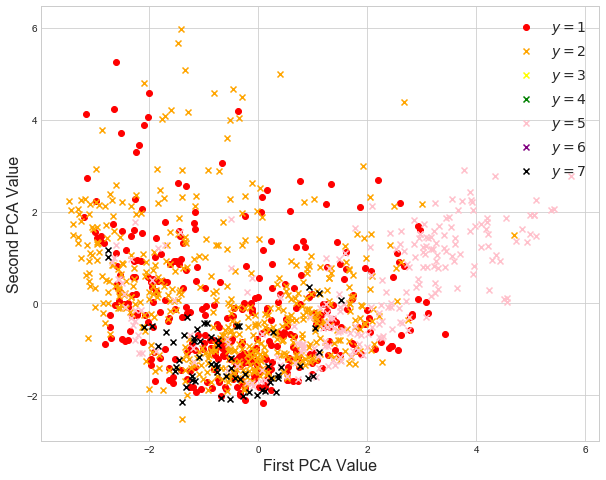

                                    component_1  component_2
Hillshade_3pm                         -0.495846     0.112804
Hillshade_Noon                        -0.445456    -0.266266
Horizontal_Distance_To_Roadways       -0.380554    -0.024781
Aspect                                -0.352045     0.298312
Elevation                             -0.247171    -0.105931
Horizontal_Distance_To_Fire_Points    -0.139717    -0.070069
Horizontal_Distance_To_Hydrology      -0.126555     0.320932
Vertical_Distance_To_Hydrology         0.057952     0.537087
Hillshade_9am                          0.297811    -0.459025
Slope                                  0.313478     0.456594


Soil_Type30


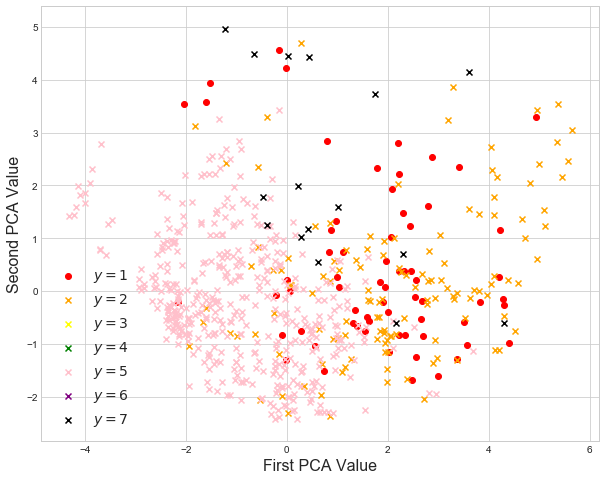

                                    component_1  component_2
Slope                                 -0.406386     0.247313
Hillshade_9am                         -0.281554    -0.154593
Vertical_Distance_To_Hydrology        -0.040961     0.567370
Horizontal_Distance_To_Hydrology       0.122308     0.571822
Horizontal_Distance_To_Fire_Points     0.126230     0.174082
Elevation                              0.257299     0.392784
Aspect                                 0.339369     0.030492
Horizontal_Distance_To_Roadways        0.378436     0.092929
Hillshade_Noon                         0.414235    -0.236233
Hillshade_3pm                          0.476265    -0.126856


Soil_Type31


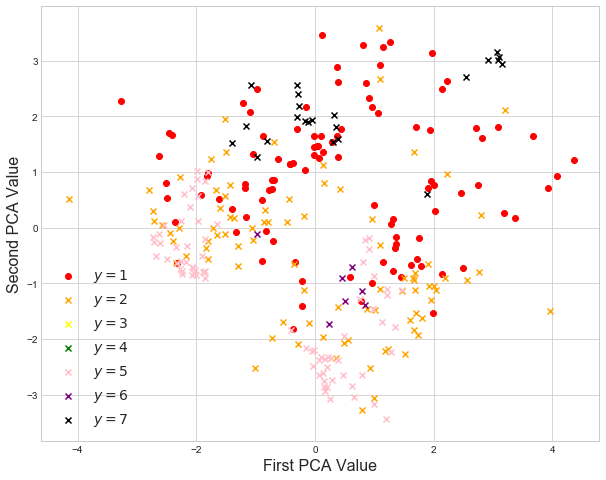

                                    component_1  component_2
Hillshade_9am                         -0.300693     0.361260
Slope                                 -0.123929    -0.076117
Horizontal_Distance_To_Roadways        0.083307     0.109145
Horizontal_Distance_To_Fire_Points     0.252911     0.313912
Elevation                              0.299497     0.408407
Vertical_Distance_To_Hydrology         0.325698     0.341983
Hillshade_Noon                         0.366289    -0.164088
Aspect                                 0.368124    -0.374084
Horizontal_Distance_To_Hydrology       0.377028     0.399330
Hillshade_3pm                          0.464447    -0.378375


Soil_Type32


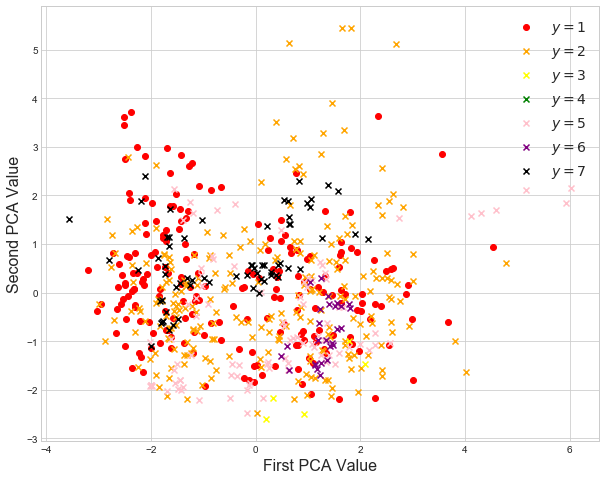

                                    component_1  component_2
Hillshade_3pm                         -0.571461     0.037159
Aspect                                -0.462424     0.023593
Hillshade_Noon                        -0.421716    -0.182412
Elevation                             -0.200521     0.274591
Horizontal_Distance_To_Roadways       -0.071945     0.137967
Horizontal_Distance_To_Hydrology      -0.002675     0.629988
Horizontal_Distance_To_Fire_Points     0.045696     0.165199
Vertical_Distance_To_Hydrology         0.098171     0.609874
Slope                                  0.206601     0.187585
Hillshade_9am                          0.426556    -0.197594


Soil_Type33


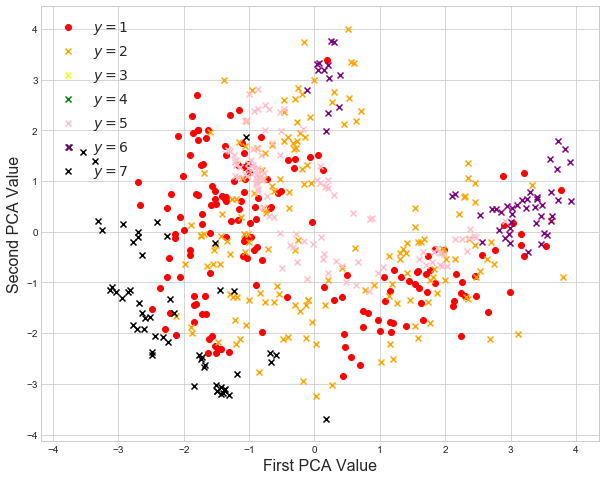

                                    component_1  component_2
Hillshade_9am                         -0.512910     0.060523
Horizontal_Distance_To_Fire_Points    -0.367749    -0.258963
Elevation                             -0.320096    -0.411445
Horizontal_Distance_To_Roadways       -0.273830    -0.326582
Horizontal_Distance_To_Hydrology      -0.077591    -0.275433
Vertical_Distance_To_Hydrology         0.061208    -0.087879
Hillshade_Noon                         0.062326    -0.534396
Slope                                  0.134728     0.234880
Aspect                                 0.418747    -0.330136
Hillshade_3pm                          0.465926    -0.346424


Soil_Type34


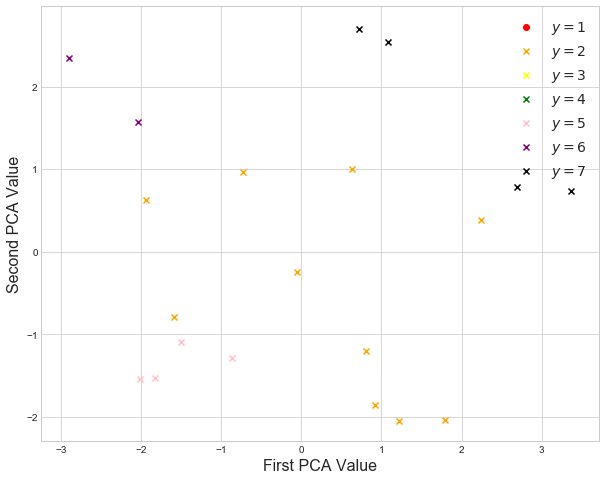

                                    component_1  component_2
Hillshade_3pm                         -0.444903     0.091477
Horizontal_Distance_To_Fire_Points    -0.362534    -0.060225
Aspect                                -0.340594     0.423736
Slope                                 -0.158666    -0.013156
Hillshade_Noon                        -0.145137    -0.326591
Vertical_Distance_To_Hydrology        -0.117720    -0.500015
Horizontal_Distance_To_Hydrology      -0.039254    -0.511768
Horizontal_Distance_To_Roadways        0.384979     0.094548
Hillshade_9am                          0.399804    -0.313285
Elevation                              0.430043     0.287418


Soil_Type35


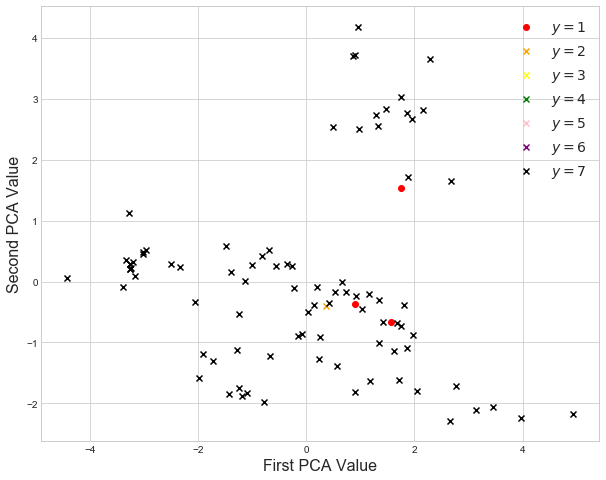

                                    component_1  component_2
Hillshade_3pm                         -0.473969     0.042465
Hillshade_Noon                        -0.382728     0.195321
Horizontal_Distance_To_Roadways       -0.379277     0.074546
Aspect                                -0.352248    -0.102777
Horizontal_Distance_To_Fire_Points    -0.241103     0.219371
Elevation                             -0.085060     0.472175
Horizontal_Distance_To_Hydrology       0.150004     0.572871
Vertical_Distance_To_Hydrology         0.177086     0.543890
Slope                                  0.266344    -0.188217
Hillshade_9am                          0.413252     0.115884


Soil_Type36


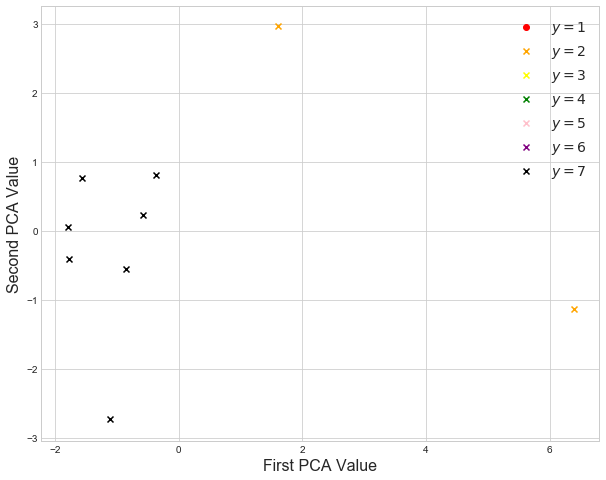

                                    component_1  component_2
Hillshade_3pm                         -0.384245     0.084785
Aspect                                -0.380323     0.190285
Hillshade_Noon                        -0.378621     0.212481
Elevation                             -0.363990    -0.132341
Horizontal_Distance_To_Roadways       -0.361776    -0.131382
Horizontal_Distance_To_Hydrology      -0.353373    -0.252969
Horizontal_Distance_To_Fire_Points    -0.108202    -0.340686
Vertical_Distance_To_Hydrology        -0.074908     0.600213
Slope                                  0.127533     0.555849
Hillshade_9am                          0.377530    -0.165517


Soil_Type37


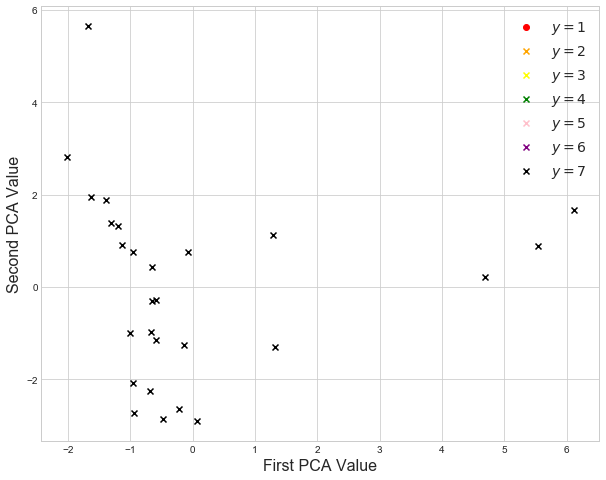

                                    component_1  component_2
Horizontal_Distance_To_Fire_Points    -0.459128    -0.008451
Slope                                 -0.335383     0.312924
Horizontal_Distance_To_Roadways       -0.027277    -0.354821
Hillshade_9am                          0.060682     0.436947
Aspect                                 0.212297     0.379512
Elevation                              0.219067     0.417054
Hillshade_3pm                          0.243061    -0.420365
Hillshade_Noon                         0.369131    -0.261861
Horizontal_Distance_To_Hydrology       0.437400     0.105865
Vertical_Distance_To_Hydrology         0.438837     0.103624


Soil_Type38


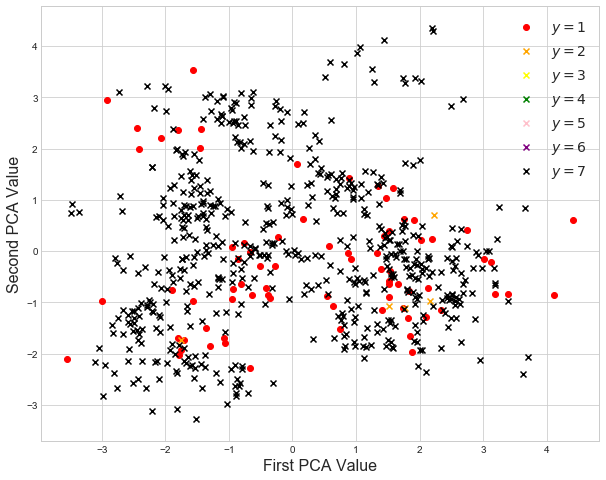

                                    component_1  component_2
Hillshade_3pm                         -0.555841    -0.108589
Aspect                                -0.493718    -0.104723
Hillshade_Noon                        -0.316487     0.162918
Elevation                             -0.196694     0.345072
Horizontal_Distance_To_Roadways       -0.176006    -0.396172
Horizontal_Distance_To_Hydrology      -0.170365     0.515089
Vertical_Distance_To_Hydrology        -0.165691     0.472159
Horizontal_Distance_To_Fire_Points     0.001477    -0.362173
Slope                                  0.040279    -0.059143
Hillshade_9am                          0.468349     0.227495


Soil_Type39


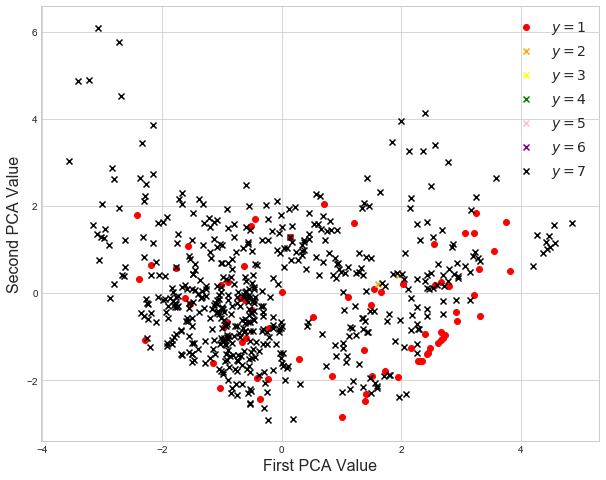

                                    component_1  component_2
Hillshade_9am                         -0.459271    -0.086937
Slope                                 -0.093400     0.549213
Horizontal_Distance_To_Fire_Points     0.069103    -0.021647
Horizontal_Distance_To_Roadways        0.188801    -0.031356
Vertical_Distance_To_Hydrology         0.222493     0.495100
Elevation                              0.247533     0.228744
Hillshade_Noon                         0.264614    -0.470947
Horizontal_Distance_To_Hydrology       0.279002     0.324829
Aspect                                 0.449803     0.041080
Hillshade_3pm                          0.528171    -0.250828


Soil_Type40


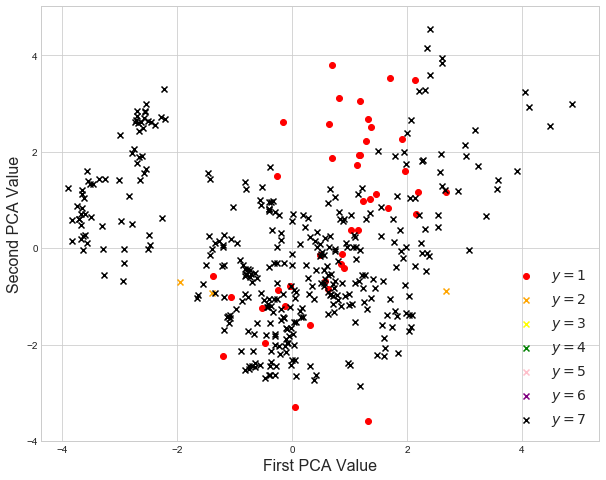

                                    component_1  component_2
Horizontal_Distance_To_Roadways       -0.400401     0.246037
Hillshade_3pm                         -0.385120    -0.438518
Horizontal_Distance_To_Hydrology      -0.376562     0.296619
Vertical_Distance_To_Hydrology        -0.358824     0.339705
Horizontal_Distance_To_Fire_Points    -0.338506     0.087163
Elevation                             -0.277130     0.229375
Aspect                                -0.232326    -0.271593
Hillshade_Noon                        -0.119170    -0.471664
Slope                                  0.157980     0.379128
Hillshade_9am                          0.369169     0.208826




In [13]:
# Trying to do the same thing for soil-types 1-40

i=1
while i <= 40:
    if i in [7,8,15,25]: #0-1 samples here
        i+=1
        continue
    soil = 'Soil_Type' + str(i)
    print(soil)
    data_temp = data_train[data_train[soil]==1]

    # Pipeline: scale -> pca(2)
    pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

    fit = pipe.fit_transform(data_temp[contvars])
    
    # Plotting graphs
    plt.figure(figsize=(10,8))

    plt.scatter(fit[data_temp.Cover_Type==1, 0], 
                fit[data_temp.Cover_Type==1, 1],
                color = 'red',
                label="$y=1$")

    plt.scatter(fit[data_temp.Cover_Type==2, 0], 
                fit[data_temp.Cover_Type==2, 1],
                color='orange',
                marker='x',
                label="$y=2$")

    plt.scatter(fit[data_temp.Cover_Type==3, 0], 
                fit[data_temp.Cover_Type==3, 1],
                color='yellow',
                marker='x',
                label="$y=3$")


    plt.scatter(fit[data_temp.Cover_Type==4, 0], 
                fit[data_temp.Cover_Type==4, 1],
                color='green',
                marker='x',
                label="$y=4$")

    plt.scatter(fit[data_temp.Cover_Type==5, 0], 
                fit[data_temp.Cover_Type==5, 1],
                color='pink',
                marker='x',
                label="$y=5$")

    plt.scatter(fit[data_temp.Cover_Type==6, 0], 
                fit[data_temp.Cover_Type==6, 1],
                color='purple',
                marker='x',
                label="$y=6$")

    plt.scatter(fit[data_temp.Cover_Type==7, 0], 
                fit[data_temp.Cover_Type==7, 1],
                color='black',
                marker='x',
                label="$y=7$")

    plt.legend(fontsize=14)

    plt.xlabel("First PCA Value", fontsize=16)
    plt.ylabel("Second PCA Value", fontsize=16)

    plt.show()
    
    # Shows what the component vectors are
    component_vectors = pd.DataFrame(pipe['pca'].components_.transpose(),
                                    columns = ['component_1', 'component_2'],
                                    index = contvars)

    print(component_vectors.sort_values('component_1'))
    print()
    print()
    
    
    i+=1

In [7]:
# Maybe 3-dimensional PCA easier to interpret? (Result: not really)

pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(3))])

fit = pipe.fit_transform(data_train[contvars])

Wilderness_Area1


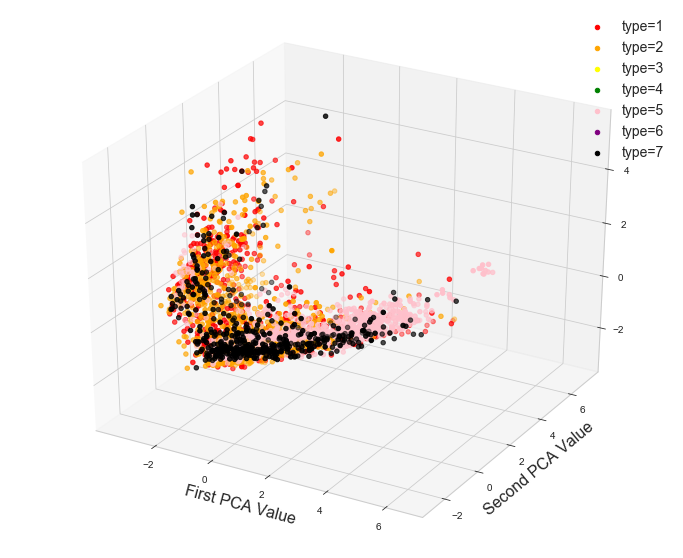

Wilderness_Area2


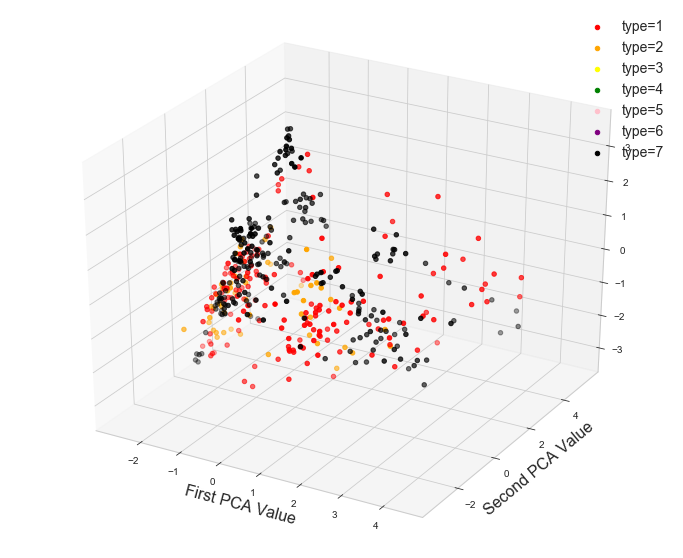

Wilderness_Area3


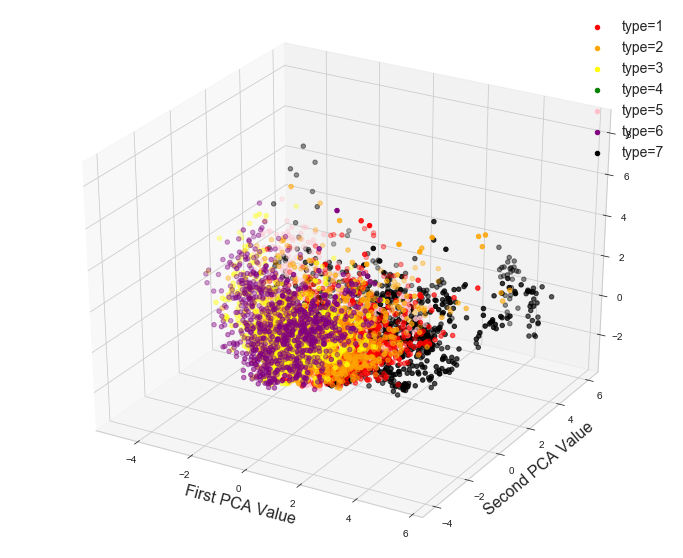

Wilderness_Area4


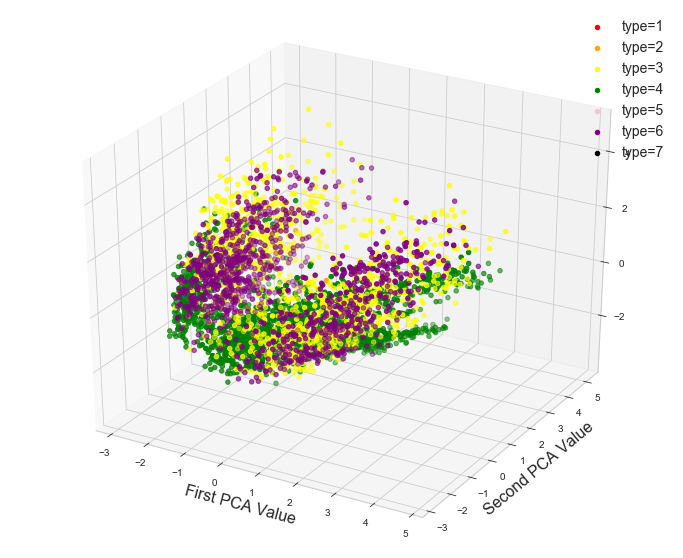

In [8]:
i=1
while i<= 4:
    wild = 'Wilderness_Area' + str(i)
    print(wild)
    data_temp = data_train[data_train[wild]==1]
    
    pipe = Pipeline([('scale', StandardScaler()),
                       ('pca', PCA(3))])

    fit = pipe.fit_transform(data_temp[contvars])



    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(fit[data_temp.Cover_Type==1, 0],
                 fit[data_temp.Cover_Type==1, 1],
                 fit[data_temp.Cover_Type==1, 2],
                 color = "red",
                 label='type=1')

    ax.scatter3D(fit[data_temp.Cover_Type==2, 0],
                 fit[data_temp.Cover_Type==2, 1],
                 fit[data_temp.Cover_Type==2, 2],
                 color = "orange",
                 label='type=2')

    ax.scatter3D(fit[data_temp.Cover_Type==3, 0],
                 fit[data_temp.Cover_Type==3, 1],
                 fit[data_temp.Cover_Type==3, 2],
                 color = "yellow",
                 label='type=3')

    ax.scatter3D(fit[data_temp.Cover_Type==4, 0],
                 fit[data_temp.Cover_Type==4, 1],
                 fit[data_temp.Cover_Type==4, 2],
                 color = "green",
                 label='type=4')

    ax.scatter3D(fit[data_temp.Cover_Type==5, 0],
                 fit[data_temp.Cover_Type==5, 1],
                 fit[data_temp.Cover_Type==5, 2],
                 color = "pink",
                 label='type=5')

    ax.scatter3D(fit[data_temp.Cover_Type==6, 0],
                 fit[data_temp.Cover_Type==6, 1],
                 fit[data_temp.Cover_Type==6, 2],
                 color = "purple",
                 label='type=6')

    ax.scatter3D(fit[data_temp.Cover_Type==7, 0],
                 fit[data_temp.Cover_Type==7, 1],
                 fit[data_temp.Cover_Type==7, 2],
                 color = "black",
                 label='type=7')



    plt.legend(fontsize=14)

    plt.xlabel("First PCA Value", fontsize=16)
    plt.ylabel("Second PCA Value", fontsize=16)


    plt.show()
    
    i+=1